In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# Add the directory containing diffusive_nested_sampling to sys.path
sys.path.append(os.path.abspath( "../.."))
import spike_and_slab

In [3]:
def log_likelihood(x):
    '''
    20-D spike and slab likelihood function

    @param x : coordinate
    @return L : likelihood
    '''
    u = 0.01
    v = 0.1

    # Spike
    t1 = np.sum(-0.5 * (x / v) ** 2) - x.size * np.log(v * np.sqrt(2 * np.pi))
    
    # Slab
    t2 = np.sum(-0.5 * ((x - 0.031) / u) ** 2) - x.size * np.log(u * np.sqrt(2 * np.pi)) + np.log(100.0)

    logL = np.logaddexp(t1, t2)
    return logL

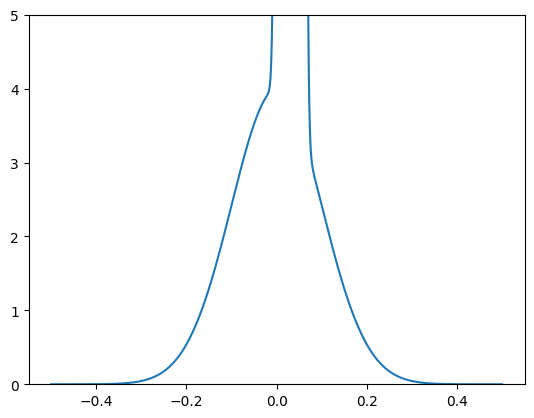

In [4]:
x = np.linspace(-0.5, 0.5, 10000)
y = np.exp([log_likelihood(x_i) for x_i in x])
plt.plot(x, y)
# plt.plot(x, y_spike)
# plt.plot(x, y_slab)
plt.ylim(0, 5)
plt.show()

In [5]:
chain, levels, js = spike_and_slab.main()

/home/tom-egg/Research/nested_sampling/diffusive_nested_sampling/dns.py:31: RuntimeWarning: divide by zero encountered in log
  self.levels = [Level(0, np.log(0.0), prev=None)]
100%|██████████| 200/200 [04:06<00:00,  1.23s/it]


100181


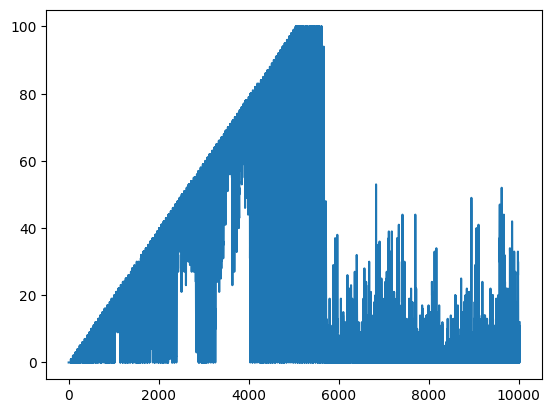

In [6]:
print(len(js))
y = js[::10]
x = range(len(y))
plt.plot(x, y)
plt.show()

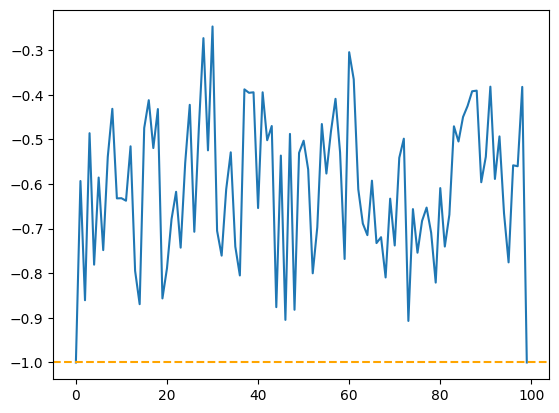

In [9]:
x = range(100)
Xs = np.array([level.get_log_X for level in levels])
y = Xs[1:] - Xs[:-1]
plt.plot(x, y)
plt.axhline(y=-1.0,linestyle='--', color='orange')
plt.show()

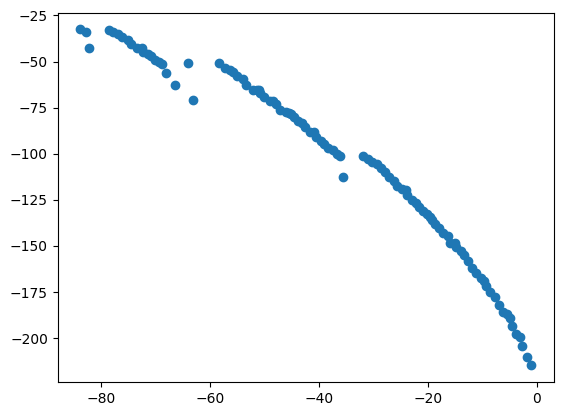

In [8]:
logL = [level.log_likelihood_bound for level in levels]
logX = [level.get_log_X for level in levels]
plt.scatter(logX, logL)

In [9]:
print([level.total_visits for level in levels])

[np.float64(68720.0), np.float64(12221.0), np.float64(13718.0), np.float64(13143.0), np.float64(10465.0), np.float64(12982.0), np.float64(10959.0), np.float64(10588.0), np.float64(7667.0), np.float64(13867.0), np.float64(12092.0), np.float64(12172.0), np.float64(12541.0), np.float64(9081.0), np.float64(7713.0), np.float64(10603.0), np.float64(13497.0), np.float64(10098.0), np.float64(8218.0), np.float64(8606.0), np.float64(7363.0), np.float64(6819.0), np.float64(2901.0), np.float64(11006.0), np.float64(5657.0), np.float64(11395.0), np.float64(9756.0), np.float64(8634.0), np.float64(7029.0), np.float64(5517.0), np.float64(6745.0), np.float64(8767.0), np.float64(9691.0), np.float64(5829.0), np.float64(10692.0), np.float64(10292.0), np.float64(3436.0), np.float64(10792.0), np.float64(10337.0), np.float64(9138.0), np.float64(8119.0), np.float64(7712.0), np.float64(6193.0), np.float64(5139.0), np.float64(5753.0), np.float64(2993.0), np.float64(139.0), np.float64(114091.0), np.float64(6286.0